# Потециально популярный продукт для магазина компьютерных игр

<h1>Оглавление проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-аналитической-задачи" data-toc-modified-id="Описание-аналитической-задачи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание аналитической задачи</a></span></li><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Знакомство-с-данными-" data-toc-modified-id="Знакомство-с-данными--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Знакомство с данными <a name="2"></a></a></span></li><li><span><a href="#Подготовка-данных-" data-toc-modified-id="Подготовка-данных--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных <a name="3"></a></a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов-" data-toc-modified-id="Переименование-столбцов--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Переименование столбцов <a name="3_1"></a></a></span></li><li><span><a href="#Обработка-пропусков-" data-toc-modified-id="Обработка-пропусков--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обработка пропусков <a name="3_3"></a></a></span></li><li><span><a href="#Изменение-типов-" data-toc-modified-id="Изменение-типов--3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изменение типов <a name="3_2"></a></a></span></li></ul></li><li><span><a href="#Расчет-суммарных-продаж-по-регионам-" data-toc-modified-id="Расчет-суммарных-продаж-по-регионам--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчет суммарных продаж по регионам <a name="3_4"></a></a></span></li><li><span><a href="#Исследовательский-анализ-данных-" data-toc-modified-id="Исследовательский-анализ-данных--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных <a name="4"></a></a></span></li><li><span><a href="#Описание-пользователя-каждого-региона-" data-toc-modified-id="Описание-пользователя-каждого-региона--6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Описание пользователя каждого региона <a name="5"></a></a></span></li><li><span><a href="#Проверка-гипотез-" data-toc-modified-id="Проверка-гипотез--7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверка гипотез <a name="6"></a></a></span></li><li><span><a href="#Общий-вывод-" data-toc-modified-id="Общий-вывод--8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод <a name="7"></a></a></span></li></ul></div>

## Описание проекта

### Описание аналитической задачи

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные за 2016 год и могут быть неполными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

### Цель проекта
Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Знакомство с данными <a name="2"></a>

Импортируем нужные программные библиотеки, установим оформление графиков и заголовков.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from collections import Counter
from pymystem3 import Mystem
from scipy import stats as st
from IPython.display import display, Markdown

sns.set()

styles = [dict(selector="caption", 
    props=[("text-align", "left"),
    ("font-size", "150%"),
    ("color", 'black')])]

Прочитаем набор данных, выведем общую информацию и первые строки. Путь к файлу: /datasets/games.csv

In [2]:
games = pd.read_csv(f'/datasets/games.csv')
games.info()
(games
    .head()
    .style
    .set_table_styles(styles)
    .set_caption('Первые строки набора данных по играм')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,nan
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1,nan,nan,nan


## Подготовка данных <a name="3"></a>

### Переименование столбцов <a name="3_1"></a>

Приведем заголовки столбцов в нижнему регистру.

In [3]:
games.columns = map(str.lower, games.columns)

### Обработка пропусков <a name="3_3"></a>

Обработаем пропуски при необходимости:
* Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишем причины, которые могли привести к пропускам;
* Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;

Пропуски в годах выпускa, видимо, связаны со особенностями сбора информации из открытых источников. Обычно это сайты, дизайн которых время от времени меняется, что вызывает проблемы с полученим определенных значений. Год выпуска восстановим по медианным значениям по платформе.

In [4]:
grouped_data = games[['platform','year_of_release']].groupby(by='platform').median()
games = games.merge(grouped_data, how='left', on='platform', suffixes=[None,'_'])
games['year_of_release'] = games['year_of_release'].fillna(games['year_of_release_'])
del games['year_of_release_']

Пару строк из таблицы данных с пропуском имени и жанра уберем из набора, слишком мало информации, чтобы нам это было полезно для анализа причин популярности игр. Вероятно, причины пропуска в этом случае все та же: изменение дизайна сайта, с которого собирали данные.

In [5]:
games.dropna(subset=['genre', 'name'], inplace=True)

Обычно абревиатура "tbd" обозначает "to be determined", что-то нерешенное, что опредилится в будущем. Похоже, что на момент сбора информации рейтинг еще не определился. Поэтому по сути это пропуск, который в дальнейшем можем обработать с остальными пропусками.

Пропуски в рейтингах могли быть по тем же причинам, что и в годах выпусках: изменение дизайна сайтов. 

Учтем, что пользовательская оценка слишком уникальная для каждой игры и не может быть восстановлена по платформе, жанру. При этом в стат. тестах лучше использовать только реальные данные, в виду того, что они очень чувствительны к этому. Важно не исказить результаты. В то же время, пропусков очень много и строки нам нужны для анализа по выручке. Поэтому сейчас оставляем пропуски в пользовательских рейтингах и рейтингах критиков, но потом перед использованием удалим строки в наборах данных, которые будут использованы в анализе.

In [6]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

Пропуски в возрастных категориях могут быть вызваны снова проблемой со сбором информации с открытых источников (изменение дизайна). Другой причиной может служит то, что игра не проходила оценку совсем. В нашем случае, пропуски заполним "RP", такой рейтинг применяется тогда, когда еще не определена окончательная возрастная категория, обычно в промоматериалах.

In [7]:
games['rating'] = games['rating'].fillna('RP')

### Изменение типов <a name="3_2"></a>

Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему.

Названия игр, жанра, возрастной категории ограниченный набор строковых значений, приведем к типу категории, чтобы сократить использование памяти. Год приведем к минимально возможному целочисленному типу uint16, который позволяет числа до 65535. Остальные приведем к минимально возможному типу с плавающему запятой float16 с максимумом 65500.0 Числа небольшие, но нам требуется работать с дробными значениями: величины относительно небольшие, поэтому дробное значение становится важным.

In [8]:
games = games.astype({
                       'year_of_release': 'uint16',
                       'na_sales': 'float16',
                       'eu_sales': 'float16',
                       'jp_sales': 'float16',
                       'other_sales': 'float16',
                       'critic_score': 'float16',
                       'user_score': 'float16'
                    })

## Расчет суммарных продаж по регионам <a name="3_4"></a>

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [9]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Теперь посмотрим на результаты нашей подготовительной работы.

In [10]:
games.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null uint16
genre              16713 non-null object
na_sales           16713 non-null float16
eu_sales           16713 non-null float16
jp_sales           16713 non-null float16
other_sales        16713 non-null float16
critic_score       8137 non-null float16
user_score         7590 non-null float16
rating             16713 non-null object
total_sales        16713 non-null float16
dtypes: float16(7), object(4), uint16(1)
memory usage: 4.6 MB


Мы подготовили данные для дальнейшего анализа. Пропуски по рейтингам пользователей и критиков оставляем, удалим непосредствено перед использованием.

## Исследовательский анализ данных <a name="4"></a>

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? Посмотрим самые непопулярные последние 20 значений, указанных годов выпуска.

In [11]:
games['year_of_release'].value_counts().tail(20)

2000    350
1999    341
1997    290
1996    263
1995    219
1994    121
1993     60
1982     53
1981     46
1992     43
1991     41
1986     21
1989     17
1983     17
1987     16
1990     16
1988     15
1984     14
1985     14
1980      9
Name: year_of_release, dtype: int64

Выберем платформы с наибольшими суммарными продажами.

In [12]:
number_of_platforms = 5

top_data = games[['platform', 'total_sales']] \
    .pivot_table(index='platform', aggfunc='sum') \
    .sort_values(by='total_sales', ascending=False) \
    .head(number_of_platforms)

display(top_data   
        .style
        .set_table_styles(styles)
        .set_caption('Продажи по платформам')
       )

top = top_data.index.to_list()

,total_sales
platform,
PS2,1256
X360,971.5
PS3,939.5
Wii,907.5
DS,806


Посмотрим, как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы? Для этого построим графики продаж по платформам.

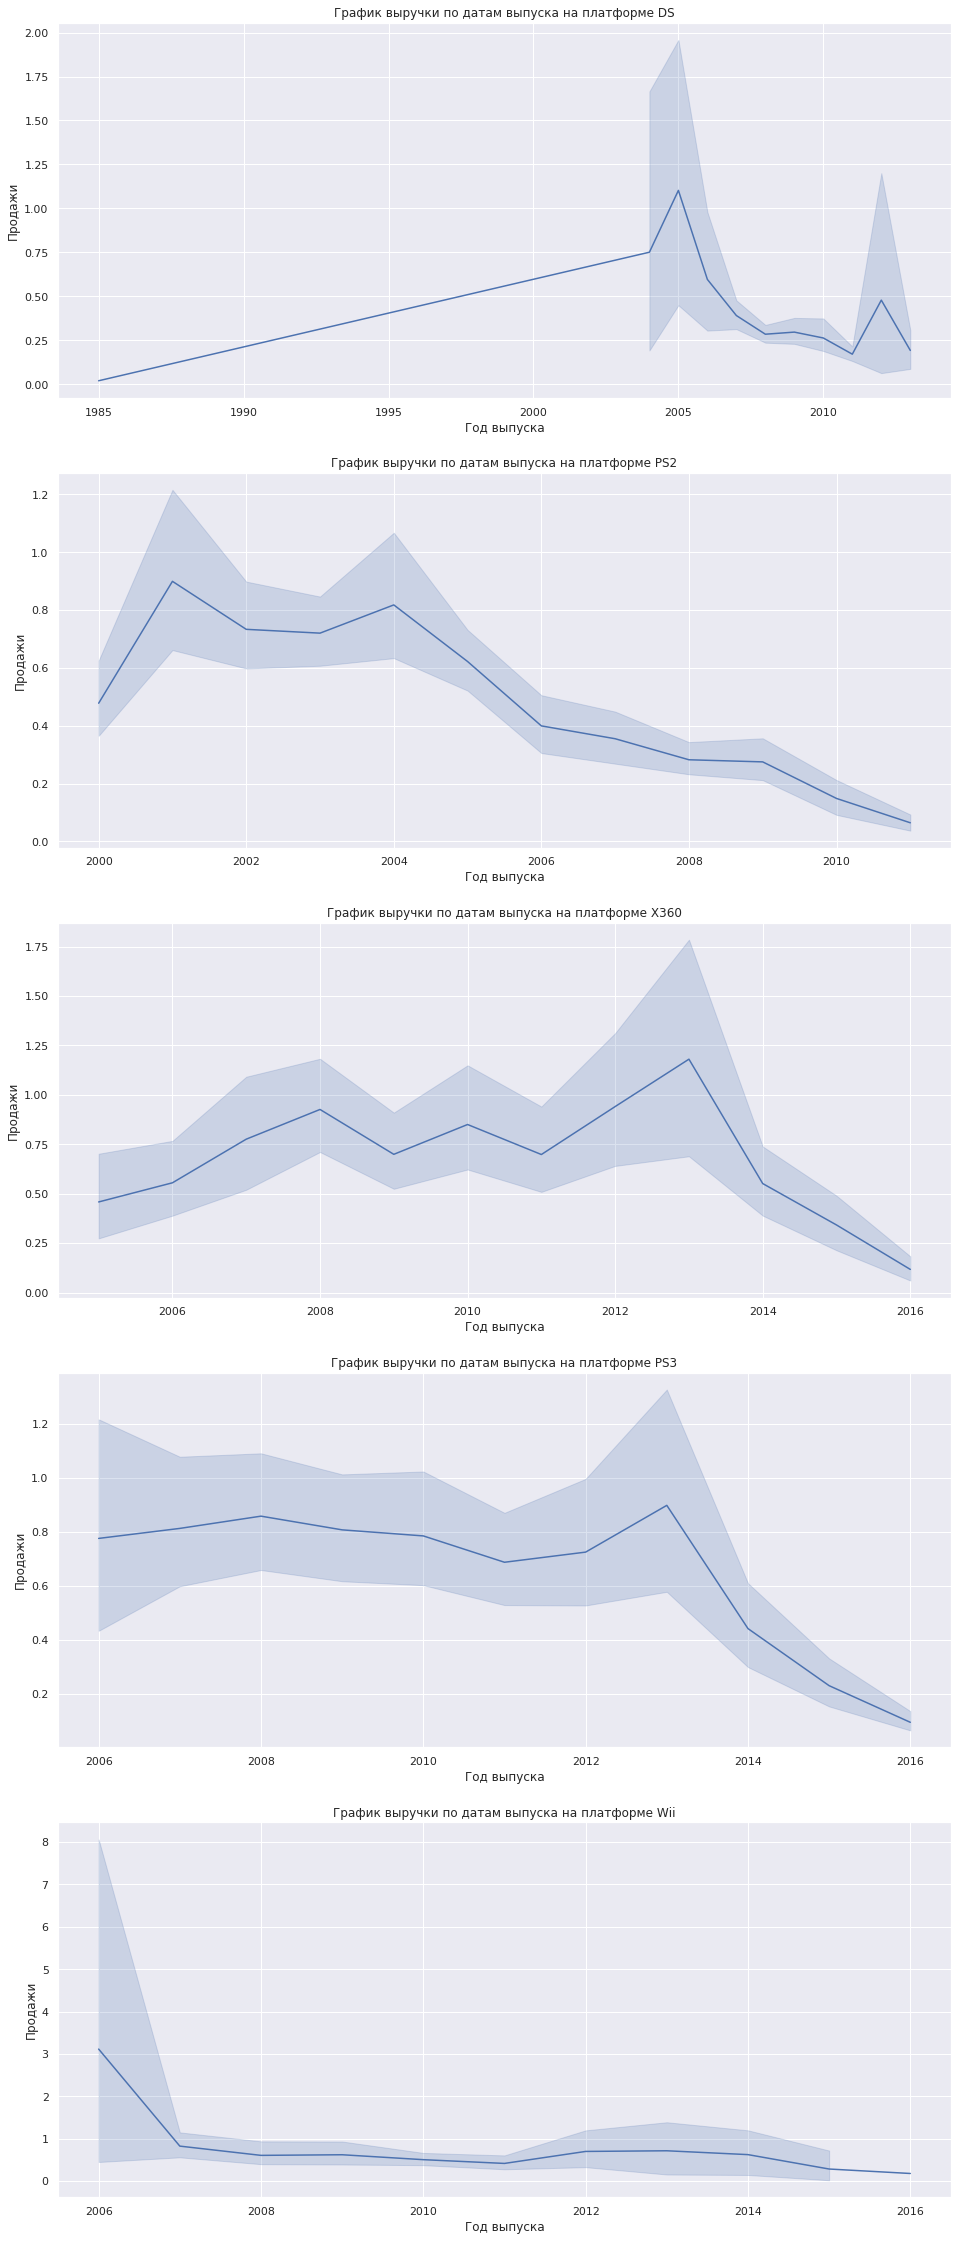

In [13]:
gr = (games.query('platform.isin(@top)')
      .pivot_table(index='platform', values='year_of_release', aggfunc='min')
      .sort_values(by='year_of_release')
     )

_, axes = plt.subplots(nrows=len(gr), figsize=(16, 8 * len(gr)))

for i, platform in enumerate(gr.index):
    data_slice = games.query('platform==@platform')
    sns.lineplot(x="year_of_release", y="total_sales", data=data_slice, ax=axes[i])
    axes[i].set_title(f'График выручки по датам выпуска на платформе {platform}')
    axes[i].set_ylabel('Продажи')
    axes[i].set_xlabel('Год выпуска')

Построим распределения по годам и платформам.

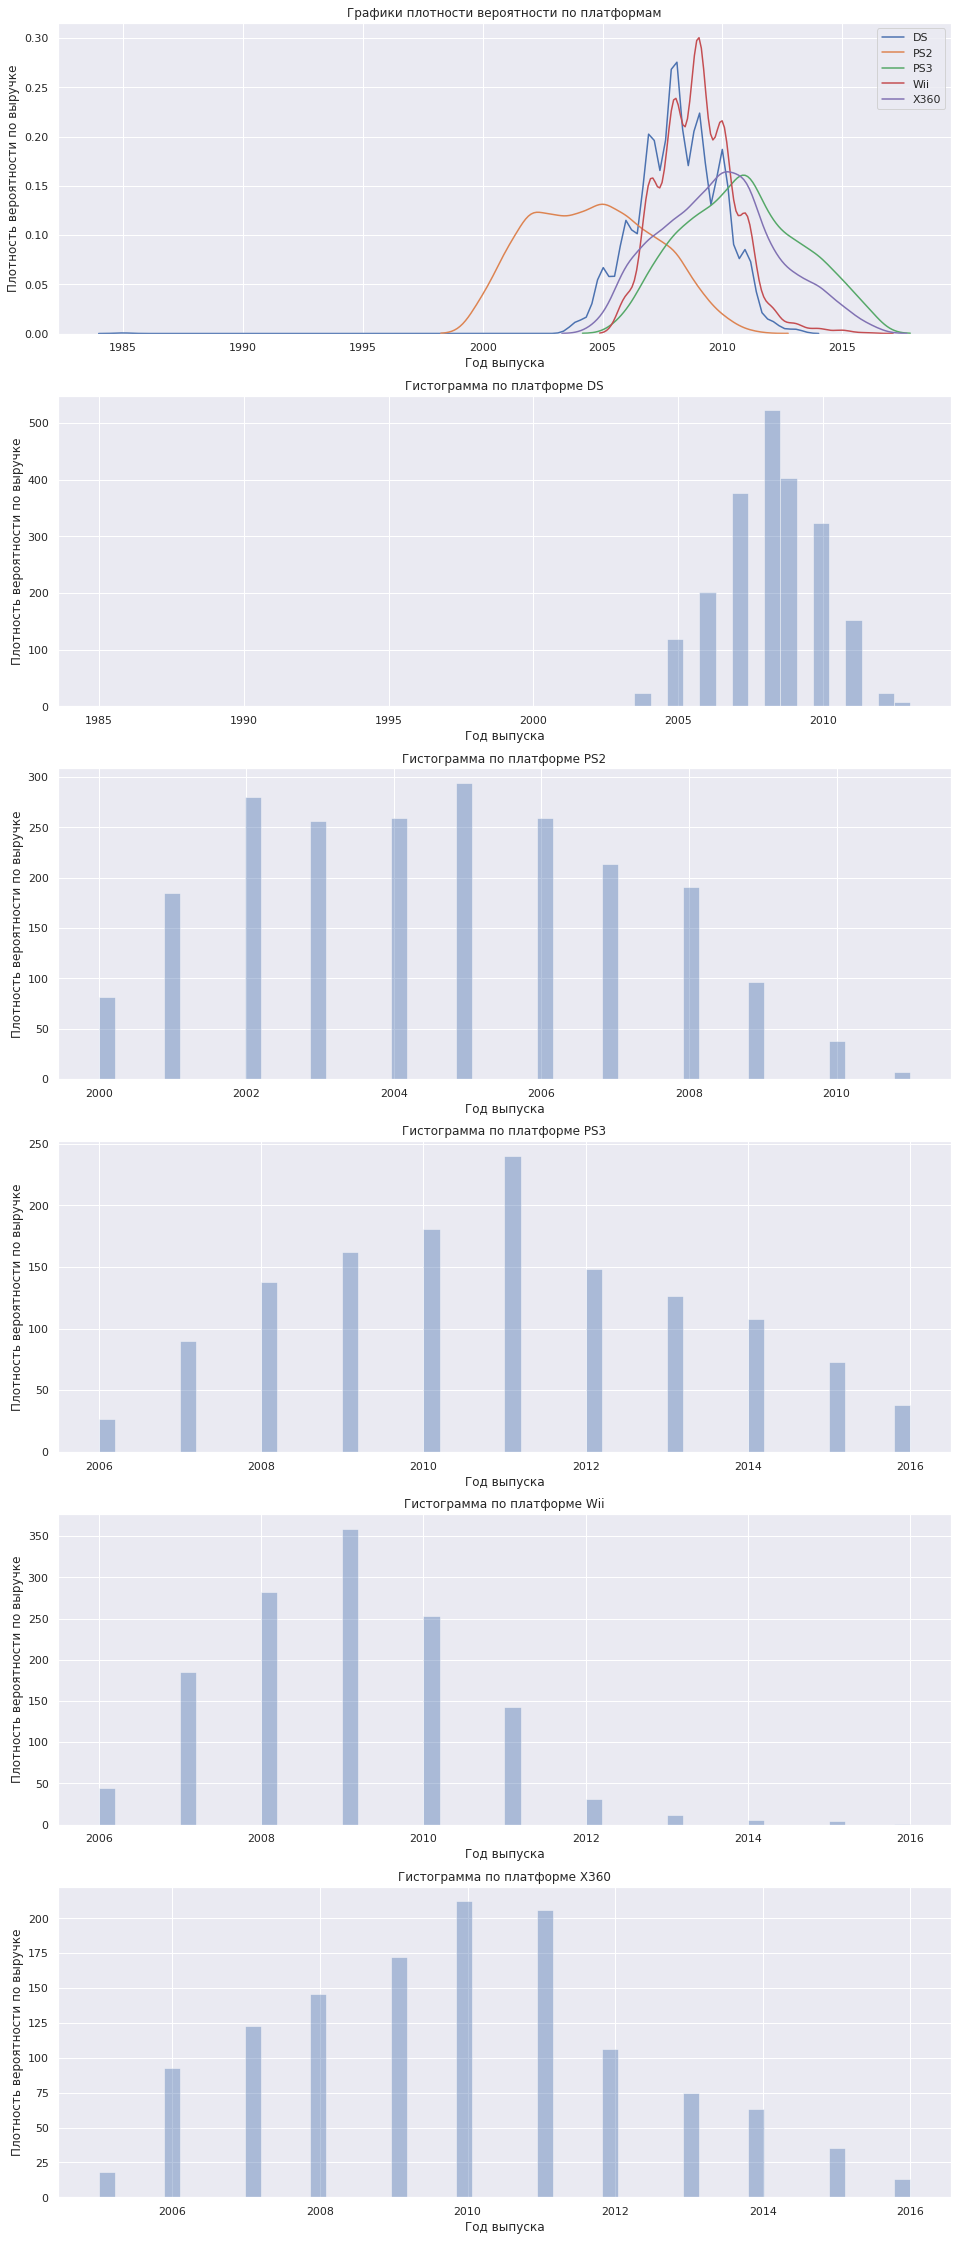

In [14]:
def show_top(top):
    _, axes = plt.subplots(nrows=1 + len(top), figsize=(16, 40))

    data = games[games['platform'].isin(top)]

    i = 1
    for platform, data_slice in data.groupby('platform'):

        sns.distplot(data_slice['year_of_release'],
                     ax=axes[0],
                     bins=50,
                     hist=False,
                     label=platform
                    )

        axes[0].set_title('Графики плотности вероятности по платформам')
        axes[0].set_ylabel('Плотность вероятности по выручке')
        axes[0].set_xlabel('Год выпуска')

        sns.distplot(data_slice['year_of_release'],
                     ax=axes[i],
                     bins=50,
                     kde=False,
                     label=platform)
        axes[i].set_title(f'Гистограмма по платформе {platform}')
        axes[i].set_ylabel('Плотность вероятности по выручке')
        axes[i].set_xlabel('Год выпуска')
        i += 1
    
    
show_top(top)

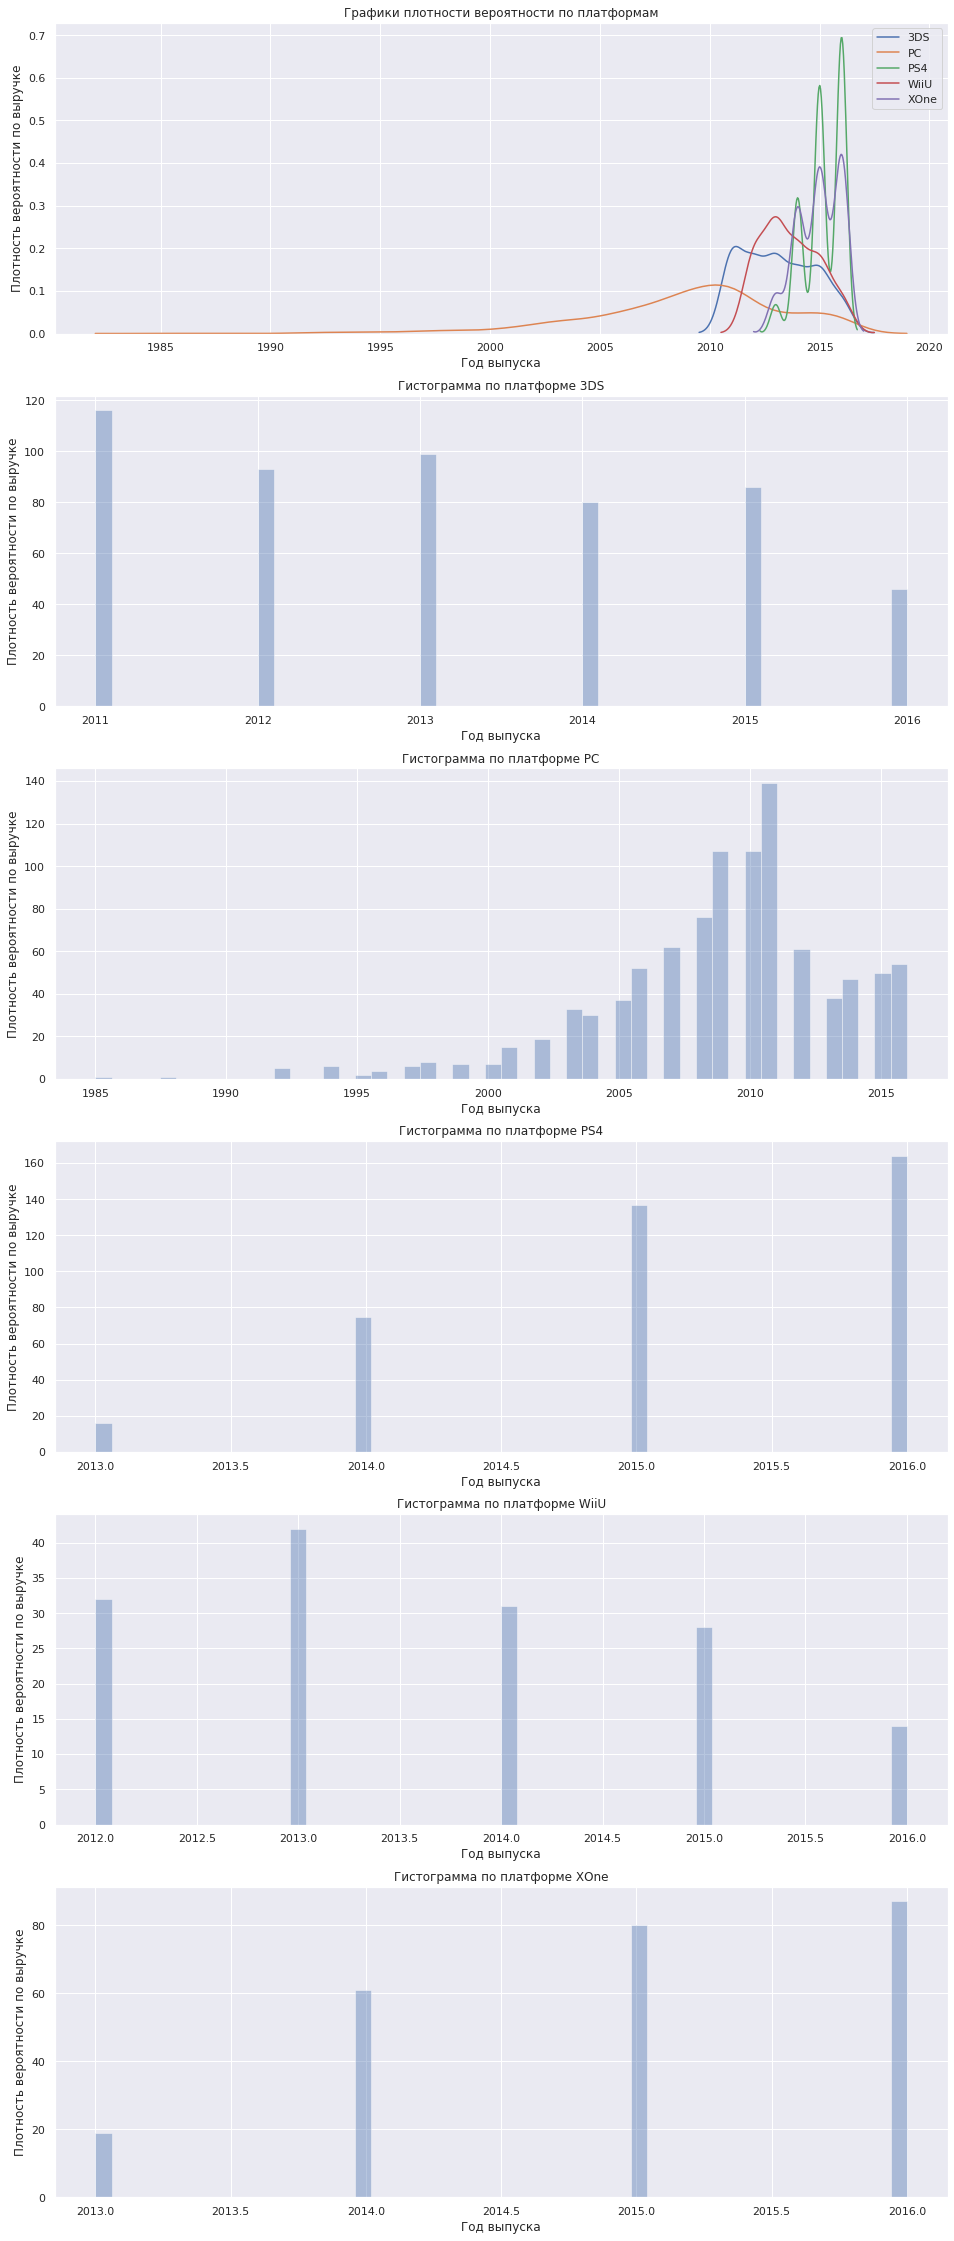

In [15]:
top_new = ['PS4', 'XOne', '3DS', 'WiiU', 'PC']

show_top(top_new)

Видим, что лидирующие платформы, вроде PlayStation и Xbox, обновляют свои платформы в течении 5 лет, но живут они дольше: вплоть до 10 лет. Возьмем данные за соответствующий актуальный период 5 лет: 2011-2016.

Наиболее прибыльная платформа PlayStation - топе по выручке оказались аж два поколения консолей.

Наиболее актуальные консоли лидирующих платформ по данным из википедии: PlayStation 4, Xbox One, Nintendo 3DS, Wii U. Их продажи не находятся сейчас в пятерке, но являются растущими. Период их роста и развития как раз попадает на выбранный актуальный период 2011-2016.

К тому же, к списку актуальных платформа добавим "вечную" платформы PC. На персональных компьютерах играли с самого начала и актуально до сих пор.

Выделим данные по актуальным платформам и периоду. 

In [16]:
actual_data = games[(games['year_of_release'] > 2011) &(games['platform'].isin(top_new))]

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

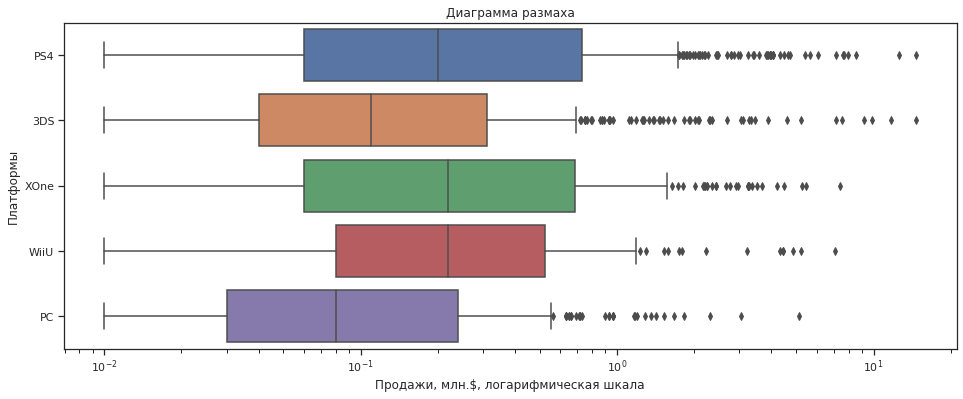

In [17]:
sns.set(style="ticks")

_, ax = plt.subplots(figsize=(16, 6))
ax.set_xscale("log")

sns.boxplot(x='total_sales',
            y='platform',
            data=actual_data,
            ax=ax,
           )

ax.set(ylabel="Платформы", xlabel="Продажи, млн.$, логарифмическая шкала", title='Диаграмма размаха');

Распределения по выручке в разрезе платформ имеют очень длинные хвосты, для того, чтобы их отобразить пришлось даже применить логарифмическую шкалу. Это говорит о феномене хита в компьютерных играх: подавляющее количество игры приносит сравнительное небольшую выручку, но стоит игре стать хитом, как она может принести многократную прибыль. Хитов как, как мы наблюдаем, довольно много на всех платформах.

Посмотрим, как влияют на продажи внутри одной популярной платформы PlayStation 4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Интерпретировать будем по следующей схеме.

     Значение	    Интерпретация
     от 0 до 0,3	 очень слабая
     от 0,3 до 0,5	 слабая
     от 0,5 до 0,7	 средняя
     от 0,7 до 0,9	 высокая
     от 0,9 до 1	 очень высокая
     
 Как и собирались ранее, перед использованием данных о рейтингах пользователей и критиков, очистим их от пропусков.

Коэффициенты корреляции Пирсона.
1. Между пользовательскими отзывами и продажами: -0.03
2. Между отзывами критиков и продажами: 0.41


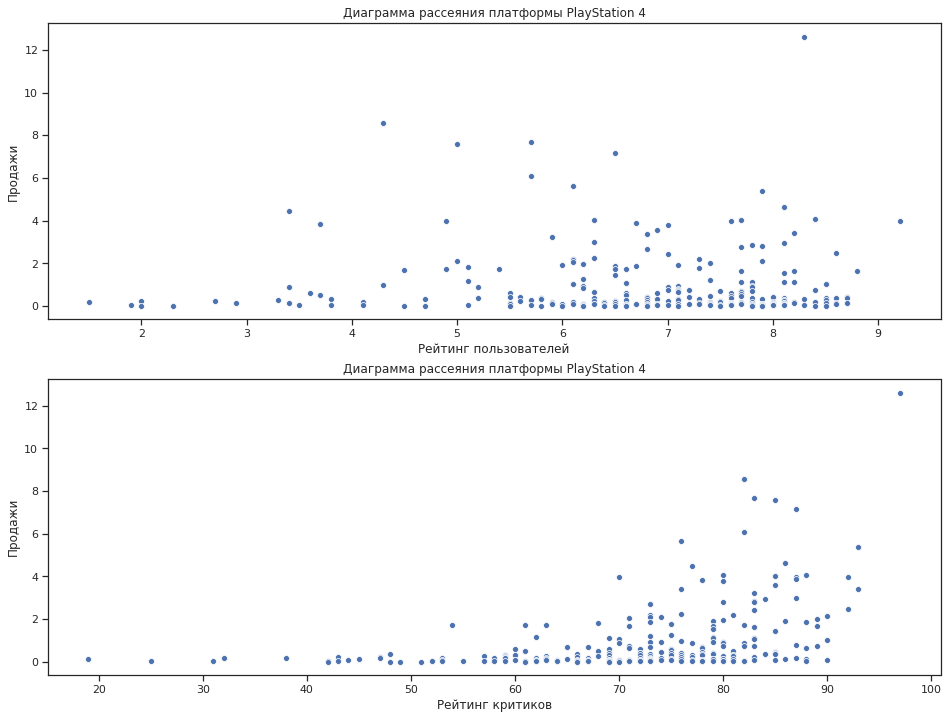

In [18]:
score_data = actual_data.dropna(subset=['user_score', 'critic_score'])

ps4_data = score_data[score_data['platform'] == 'PS4'].copy()

k1 = ps4_data['user_score'].corr(ps4_data['total_sales'])
k2 = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print('Коэффициенты корреляции Пирсона.')
print(f'1. Между пользовательскими отзывами и продажами: {k1:.2f}')
print(f'2. Между отзывами критиков и продажами: {k2:.2f}')

_, axes = plt.subplots(nrows=2, figsize=(16, 12))

sns.scatterplot(x="user_score", y="total_sales",
                     data=ps4_data, ax=axes[0])

axes[0].set(ylabel="Продажи",
            xlabel="Рейтинг пользователей",
            title='Диаграмма рассеяния платформы PlayStation 4')

sns.scatterplot(x="critic_score", y="total_sales",
                     data=ps4_data, ax=axes[1])

axes[1].set(ylabel="Продажи",
            xlabel="Рейтинг критиков",
            title='Диаграмма рассеяния платформы PlayStation 4');

Видим отсутствующую связь между пользовательскими отзывами и продажами. Связь посильнее, если речь о рейтинге критиков.
Соотнесем выводы с продажами игр на других платформах.

Коэффициенты корреляции Пирсона.
Название платформы 3DS
1. Между пользовательскими отзывами и продажами: 0.21
2. Между отзывами критиков и продажами: 0.31
Название платформы PC
1. Между пользовательскими отзывами и продажами: -0.14
2. Между отзывами критиков и продажами: 0.24
Название платформы PS4
1. Между пользовательскими отзывами и продажами: -0.03
2. Между отзывами критиков и продажами: 0.41
Название платформы WiiU
1. Между пользовательскими отзывами и продажами: 0.39
2. Между отзывами критиков и продажами: 0.35
Название платформы XOne
1. Между пользовательскими отзывами и продажами: -0.09
2. Между отзывами критиков и продажами: 0.41


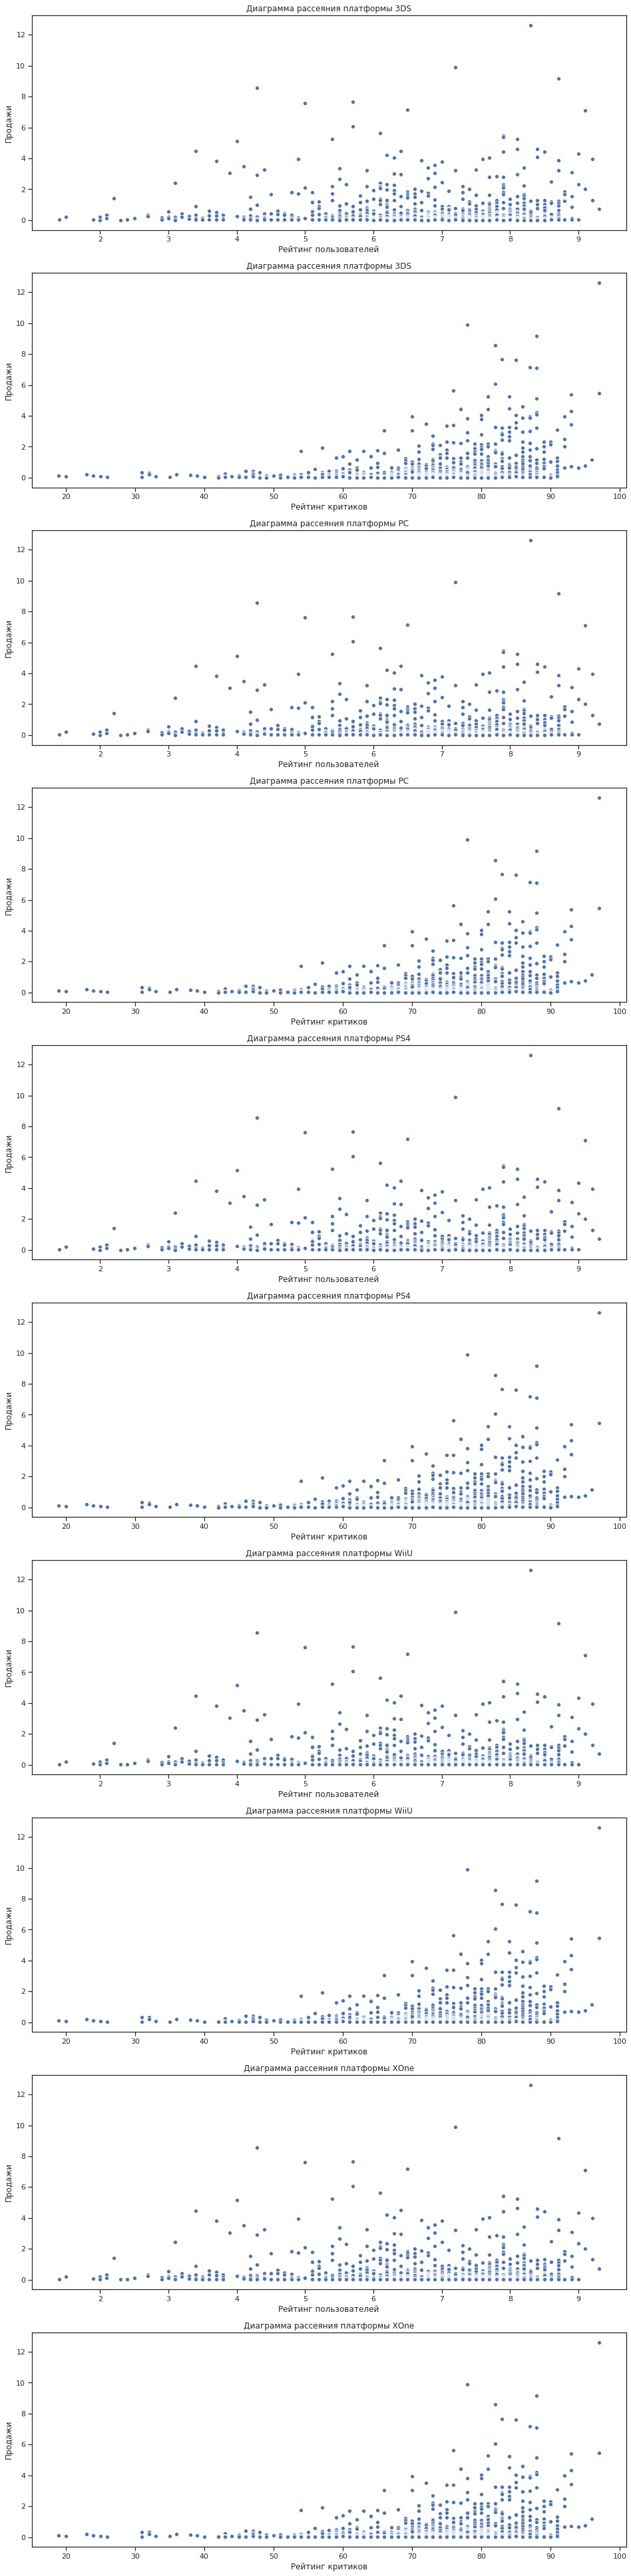

In [19]:
_, axes = plt.subplots(nrows=10, figsize=(16, 14*5))
i = 0
print('Коэффициенты корреляции Пирсона.')
for platform, data_slice in score_data.groupby('platform'):
    print('Название платформы', platform)
    k1 = data_slice['user_score'].corr(data_slice['total_sales'])
    k2 = data_slice['critic_score'].corr(data_slice['total_sales'])
    print(f'1. Между пользовательскими отзывами и продажами: {k1:.2f}')
    print(f'2. Между отзывами критиков и продажами: {k2:.2f}')  
    sns.scatterplot(x="user_score", y="total_sales", data=score_data, ax=axes[i])
    axes[i].set(ylabel="Продажи",
                xlabel="Рейтинг пользователей",
                title=f'Диаграмма рассеяния платформы {platform}')

    sns.scatterplot(x="critic_score", y="total_sales", data=score_data, ax=axes[i+1])
    axes[i+1].set(ylabel="Продажи",
                xlabel="Рейтинг критиков",
                title=f'Диаграмма рассеяния платформы {platform}')
    i += 2

Ситуация по другим платформам похожая: связь между отзывами и продажами очень слабая. Причем, для двух главных конкурирующих платформ Sony Playstation и Microsoft Xbox связь между рейтингом критиков и продажами чуть сильнее. Похоже, на этих платформах скопилась экспертиза и рейтинги экспертов пользуются большим доверием и мнение критиков чуть более значимо.

Посмотрим на общее распределение игр по жанрам. Дадим ответы на следующие вопросы. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,total_sales
genre,
Action,211.5
Shooter,169.375
Role-Playing,135.375
Sports,93
Platform,49.4062
Misc,38.25
Simulation,31.7656
Racing,31.4062
Fighting,25.9531


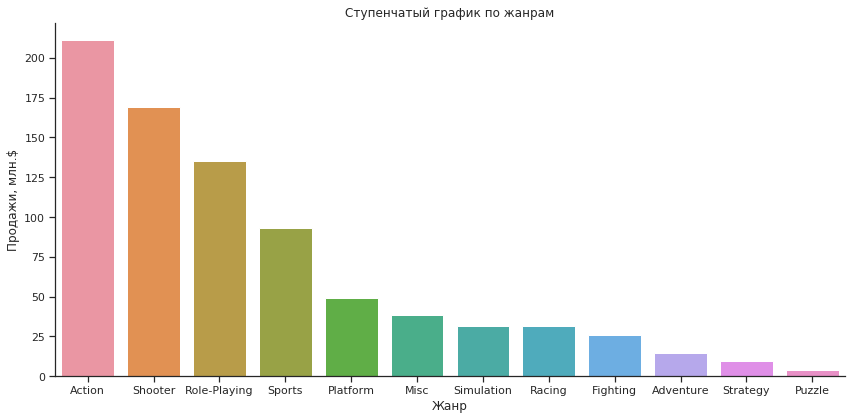

In [20]:
actual_data_d = actual_data[['genre','total_sales']] \
        .pivot_table(index='genre', aggfunc='sum') \
        .sort_values(by='total_sales', ascending=False)

display(actual_data_d
        .style
        .set_table_styles(styles)
        .set_caption('Продажи по жанрам')
       )

f, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=actual_data_d.index, y="total_sales", 
            data=actual_data_d,
            order=actual_data_d.index,
            ax=ax)

ax.set(ylabel="Продажи, млн.$",
            xlabel="Жанр",
            title='Ступенчатый график по жанрам')

sns.despine(bottom=False)
plt.tight_layout(h_pad=2)

Наиболее денежные жанры: боевики, спортивные симуляторы и шутеры. Наименее покупаемые:  приключения, пазлы и стратегии.

## Описание пользователя каждого региона <a name="5"></a>

Определим для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Самые популярные жанры (топ-5). Поясним разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,na_sales
platform,
PS4,34
XOne,30
3DS,18
WiiU,12
PC,6


,eu_sales
platform,
PS4,47
XOne,17
3DS,14
PC,13
WiiU,8


,jp_sales
platform,
3DS,75
PS4,14
WiiU,11
XOne,0
PC,0


,na_sales
genre,
Action,26
Shooter,24
Role-Playing,14
Sports,12
Platform,6


,eu_sales
genre,
Action,26
Shooter,22
Sports,13
Role-Playing,12
Platform,6


,jp_sales
genre,
Role-Playing,37
Action,24
Simulation,8
Platform,7
Misc,7


,na_sales
rating,
M,33
RP,23
E,20
E10+,12
T,12


,eu_sales
rating,
M,34
E,23
RP,22
T,12
E10+,10


,jp_sales
rating,
RP,59
E,20
T,8
E10+,6
M,6


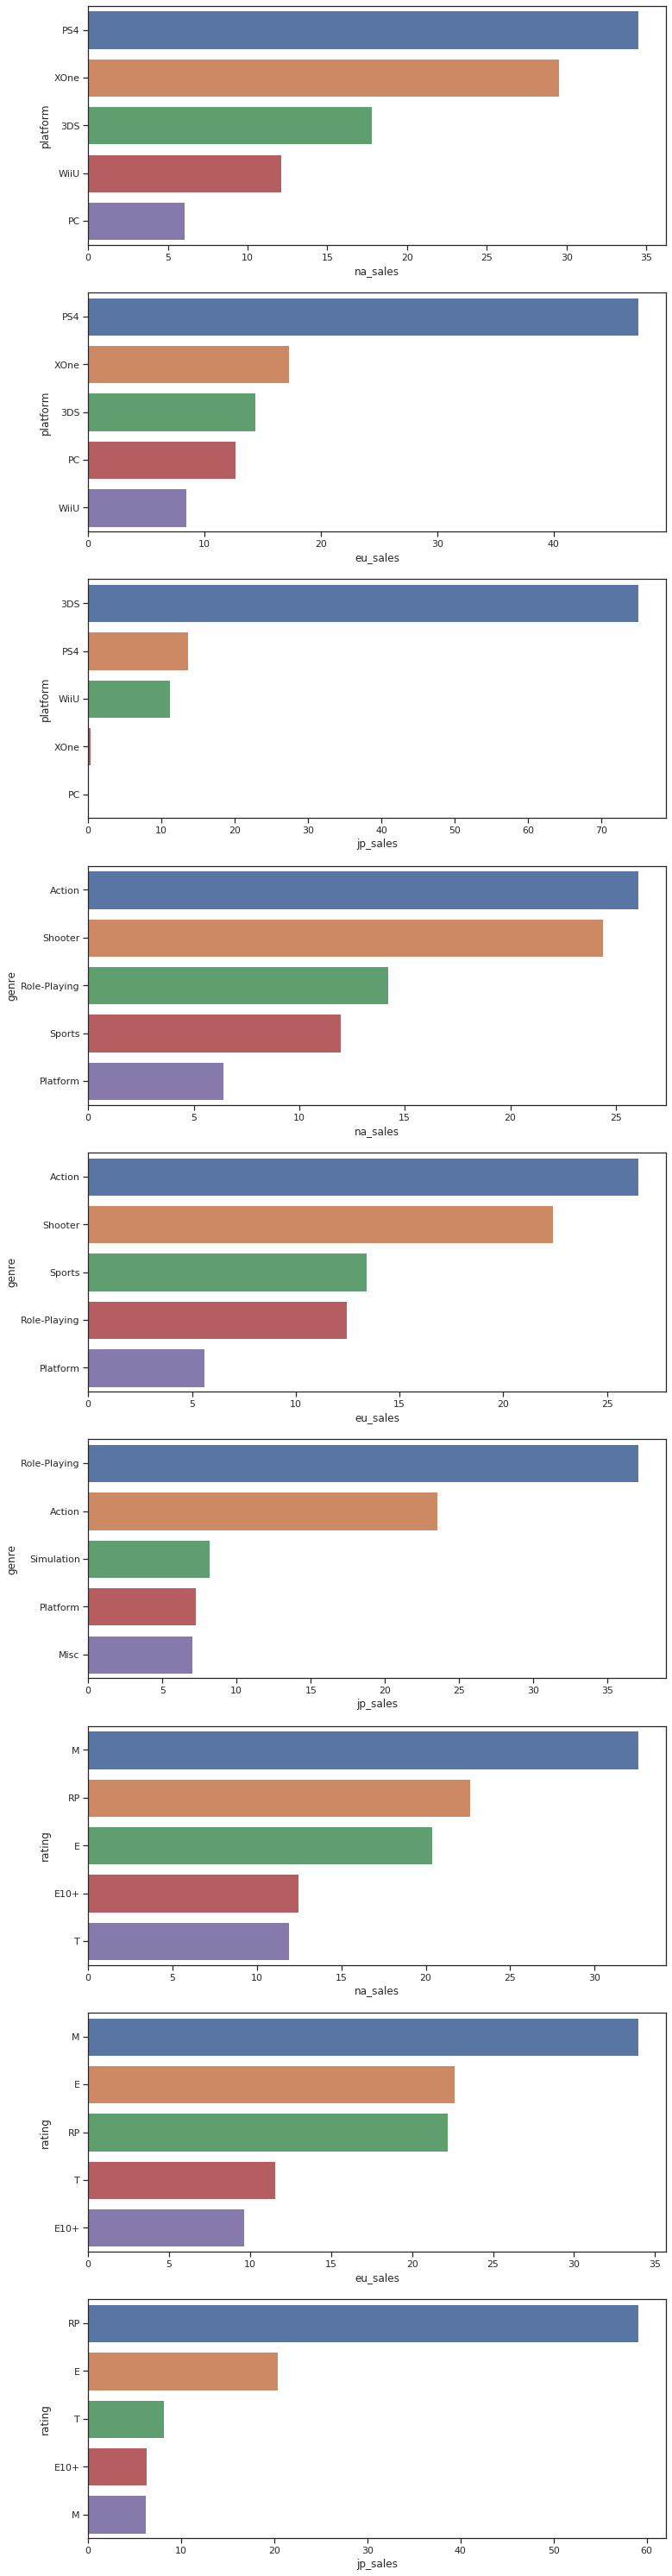

In [21]:
f, axes = plt.subplots(figsize=(12, 6*9), nrows=9)

def show_sales(feature, region, i):
    region_sales = region + '_sales'  
    
    if region == 'na':
        region_title = 'Америке'
    elif region == 'eu':
        region_title = 'Европе'
    elif region == 'jp':
        region_title = 'Японии'
    
    if feature == 'platform':
        feature_title = 'платформам'
    elif feature == 'genre':
        feature_title = 'жанрам'
    elif feature == 'rating':
        feature_title = 'возрастной категории'
    
    result = actual_data[[feature, region_sales]].pivot_table(index=feature, aggfunc='sum')
    result = result * 100 / result[region_sales].sum()
    result = result.sort_values(by=region_sales, ascending=False)
    result = result.head()
  
    sns.barplot(x=region_sales, y=result.index, 
            data=result,
            orient='h',
            ax=axes[i])
    
    display(result \
            .style \
            .set_table_styles(styles) \
            .format('{:,.0f}') \
            .set_caption(f'Продажи по {feature_title} в {region_title}'))
    

regions = ['na', 'eu', 'jp']
features = ['platform', 'genre', 'rating']
i = 0
for feature in features:
    for region in regions:
        show_sales(feature, region, i)
        i += 1

Обратим внимание, что на первом месте в Японии возрастная категория RP, на втором E. Так как RP означает, что окончательный рейтинг не назначен или отсутствует, то будем считать, что в Японии самая продаваемая возрастная категория E.

Пользователь Северной Америки предпочитает платформу Microsoft X360, играет без ограничений по возрасту в боевики. Пользователь Европы предпочитает платформу Playstation 3, играет без ограничений по возрасту в боевики. Пользователь Японии предпочитает платформу Nintendo DS, играет без ограничений по возрасту в ролевые игры.

Есть явновыраженные предпочтения по платформам в регионам. В Европе и Америки любят играть в боевики, а в Японии в ролевые игры. Без возрастного ограничения с рейтингом E продаются лучше всего везде.

Мы нашли важную особенность японского рынка игр, а именно большое число игр без рейтинга. Это связанно с тем, что организация ESRB - американская и призвана регулировать игры именно на американском рынке, тогда как для японского рынка наличие рейтинга этой организации не является обязательным.

## Проверка гипотез <a name="6"></a>

Зададим пороговое значение alpha 5%. 

Объясним:
* Как мы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

**Нулевая гипотеза H₀**

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

**Альтернативная гипотеза H₁**

*Средние пользовательские рейтинги платформ Xbox One и PC различаются*

Для проверки гипотез применим Т-критерий Стьюдента, потому что он позволяет сравнивать средние значения в выборках.

Прежде, чем проверить гипотезы, сравним дисперсии в выборках, чтобы правильно выбрать метод сравнения.

In [22]:
sample_1 = score_data[score_data['platform'] == 'XOne']['user_score']
sample_2 = score_data[score_data['platform'] == 'PC']['user_score']
print('Дисперсия по платформе XOne:', np.var(sample_1))
print('Дисперсия по платформе PC:', np.var(sample_2))

Дисперсия по платформе XOne: 1.785
Дисперсия по платформе PC: 2.676


Видим, что дисперсии значильно отличаются. Применяем тест Велча, параметр equal_var False.

In [27]:
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение: ', results.pvalue);
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2104824011052708e-09
Отвергаем нулевую гипотезу


Проверяем следующую гипотезу.

**Нулевая гипотеза H₀**

*Средние пользовательские рейтинги жанров боевики и спортивные симуляторы одинаковые*

**Альтернативная гипотеза H₁**

*Средние пользовательские рейтинги жанров боевики и спортивные симуляторы разные*

Для проверки гипотез применим Т-критерий Стьюдента, потому что он позволяет сравнивать средние значения в выборках.

Прежде, чем проверить гипотезы, сравним дисперсии в выборках, чтобы правильно выбрать метод сравнения.

In [24]:
sample_1 = score_data[score_data['genre'] == 'Action']['user_score']
sample_2 = score_data[score_data['genre'] == 'Sports']['user_score']
print('Дисперсия по боевикам:', np.var(sample_1))
print('Дисперсия по спортивным симуляторам:', np.var(sample_2))

Дисперсия по боевикам: 1.771
Дисперсия по спортивным симуляторам: 2.174


Видим, что дисперсии значильно отличаются. Применяем тест Велча, параметр equal_var False.

In [26]:
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение: ', results.pvalue);
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2104824011052708e-09
Отвергаем нулевую гипотезу


Так как не получилось отвергнуть нулевую гипотезу, то можем считать, что средние пользовательские рейтинги жанров боевики и спортивные симуляторы одинаковые.

## Общий вывод <a name="7"></a>

Мы ставили перед собой цель определить закономерности успешных проектов и понять какой должен был популярный и продаваемый продукт.

В результате проведенного исследования мы выяснили пятерку самых продаваемых платформ, поэтому новая игра должна быть на современных аналогичных платформах: PlayStation 4, Xbox One, Nintendo 3DS, Wii U.

При анализе данных обнаружили феномен хита, есть возможность сделать игру так, чтобы она принесет кратно больше выручки, чем в среднем. Поэтому есть смысл сфокусировать усилия на качественном популярном результате.

В ходе рекламной кампании следует учитывать, что пользовательский рейтинг и рейтинг критиков слабо влияет на продажи. Однако, по главным конкурирующим платформам PlayStation и Xbox имеет больший вес рейтинг критиков. Лучше поэтому направить рекламный бюджет в большей степени на улучшения восприятия критиками.

Самые прибыльные жанры: боевики, спортивные симуляторы и стрелялки. Однако, в Японии пользуются большим спросом ролевые игры. Следует это учитывать при выборе жанра для будущей игры. Определится нужно в зависимости от того, в каком регионе планируется запуск в первой очереди. Не следует делать пазлы, приключения и особенно стратегии.

Больше всего продаются игры с возрастной категорией E, то есть для всех возрастов. Поэтому нужно подумать о том, чтобы в будующей игре ограничить жестокие сцены, кровь, наркотики и сексуальные сцены.

Кроме того, Т-критерий Стьюдента показал, что средние пользовательские рейтинги платформ Xbox One и PC близки. Поэтому в ходе рекламной кампании нужно будет это учитывать. Следует внимательно отнестись к адаптации игры к разным платформам.

А вот разница в пользовательском приеме в зависимости от жанра можно считать разной. Для каждого жанра есть свои суперпопулярные качественные хиты. Нужно постараться сделать новую игру именно такой.